<a href="https://colab.research.google.com/github/SmirnovGrigory/Google-Collab-Archive/blob/main/Lab_3_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [119]:
import pandas as pd

In [120]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', None)

In [121]:
df = pd.read_csv("students_data.csv")

df.shape

(1044, 36)

In [122]:
df.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [123]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Предобработка данных

* Разделите данные на две части - данные для моделирования (80%) и отложенную выборку (20%). Убедитесь, что распределение целевой переменной (`G3`) одинаково в обоих частях.  
  __NB__: Отложенную выборку нужно использовать только для финальной оценки качества модели. Обучение и кросс-валидацию следует проводить на данных для моделирования.  
* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

**Преобразования**

In [124]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1044 non-null   int64  
 1   Subject     1044 non-null   object 
 2   school      1044 non-null   object 
 3   sex         1044 non-null   object 
 4   age         1044 non-null   int64  
 5   address     1044 non-null   object 
 6   famsize     1044 non-null   object 
 7   Pstatus     1044 non-null   object 
 8   Medu        1044 non-null   object 
 9   Fedu        1044 non-null   object 
 10  Mjob        1044 non-null   object 
 11  Fjob        1044 non-null   object 
 12  reason      1044 non-null   object 
 13  guardian    1044 non-null   object 
 14  traveltime  1044 non-null   int64  
 15  studytime   1044 non-null   int64  
 16  failures    1044 non-null   int64  
 17  schoolsup   1044 non-null   object 
 18  famsup      1044 non-null   object 
 19  paid        1044 non-null  

In [126]:
for feature in df.columns:
  print(feature, df[feature].unique())

ID [100097 101021 102965 ... 998425 999143 999194]
Subject ['Por' 'Math']
school ['GP' 'MS']
sex ['F' 'M' 'm']
age [16 17 18 15 19 21 20 22]
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T' 't']
Medu ['3' '1' '2' '4' '0' 'o']
Fedu ['4' '2' '3' '1' 'o' '0']
Mjob ['services' 'other' 'health' 'at_home' 'teacher' 'at-home']
Fjob ['other' 'services' 'health' 'at-home' 'teacher' 'at_home']
reason ['course' 'home' 'reputation' 'other']
guardian ['father' 'mother' 'other' 'futher']
traveltime [1 2 3 4]
studytime [1 2 4 3]
failures [0 2 1 3]
schoolsup ['no' 'yes']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['yes' 'no']
romantic ['no' nan 'yes']
famrel [ 3.  5.  4.  1.  2. nan]
freetime [2 3 4 1 5]
goout [1 4 5 3 2]
Dalc [ 1.  3.  4.  2.  5. nan]
Walc [ 4.  3.  5.  1.  2. nan]
health [5 3 4 2 1]
absences [12  2  0  4  6 10  7 20 14 11 24  8 16 21  1 18  5 22  9  3 15 26 25 54
 56 40 19 13 38 30 17 28 32 23 75]
cheating 

исправляем опечатки

In [127]:
for index in df.index:
  if df.loc[index,'Medu'] == 'o':
    df.loc[index,'Medu'] = '0'
  if df.loc[index,'Fedu'] == 'o':
    df.loc[index,'Fedu'] = '0'
  if df.loc[index,'sex'] == 'm':
    df.loc[index,'sex'] = 'M'
  if df.loc[index,'guardian'] == 'futher':
    df.loc[index,'guardian'] = 'father'
  if df.loc[index,'Mjob'] == 'at-home':
    df.loc[index,'Mjob'] = "at_home"
  if df.loc[index,'Fjob'] == 'at-home':
    df.loc[index,'Fjob'] = "at_home"
  if df.loc[index,'Pstatus'] == 't':
    df.loc[index,'Pstatus'] = "T"

In [128]:
df['Fedu']=df.Fedu.astype('int64')
df['Medu']=df.Medu.astype('int64')

In [129]:
df=df.dropna(subset=['romantic', 'famrel', 'Dalc', 'Walc'])

In [130]:
df['Dalc']=df.Dalc.astype('int64')
df['Walc']=df.Walc.astype('int64')
df['famrel']=df.famrel.astype('int64')

По признакам **romantic**, **famrel**, **Dalc**, **Walc** пропущенных значений совсем не много, можно просто удалить соответствующие наблюдения

иная ситуация с **cheating** здесь наблюдений с пропущенными значениями большинство, удалять ни в коем случае нельзя.
Моя мысль следующая:
**"yes"** - это тот, кто однозначно был пойман за списыванием. 
**"no"** - это тот, чья благонадежность не подлежит сомнениям
**NаN** - это тот, о ком нет достоверной информации о списывании, но и быть увереным, что данный человек никогда не списывал нельзя. По этому можно выделить NaN в этом признаке как отдельное значение признака и использовать при дальнейшем анализе.

добавляем значение признака "No info", т.к. не хотим удалять признак и с NaN работать не всегда удобно

In [131]:
for index in df.index:
  if pd.isna(df.loc[index,'cheating']):
    df.loc[index,'cheating'] = 'No info'

**Не значимые признаки**

Может показаться, что в данных довольно много признаков которые, казалось бы, не могут никак влиять на итоговую оценку. Но я считаю, что большинство признаков важны так как могут иметь косвенное влияние

сомнения могут вызывать признаки **romantic, famrel, health, address, traveltime**

но

romantic, famrel, health влияют на эмоциональное состояние студента

address, traveltime влияют на признак abscences, который в свою очередь имеет уже непосредственное влияние на признак absences, который в свою очередь уже имеет довольно значимое слияние на оценку

я принял решение исключить признаки famsize, guardian, Pstatus несмотря на то, что все эти признаки связаны с семьей, особой корреляции между ними и эмоциональным состоянием или временем, выделяемым на учебу я не нашел

In [132]:
df=df.drop(columns=['famsize', 'guardian','Pstatus','ID'])
df.columns

Index(['Subject', 'school', 'sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'reason', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'cheating', 'G1', 'G2', 'G3'],
      dtype='object')

**Разделение на две выборки**

In [133]:
df.shape

(1004, 32)

In [134]:
df_train, df_test = train_test_split(df, test_size=0.2)
df_train.shape

(803, 32)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

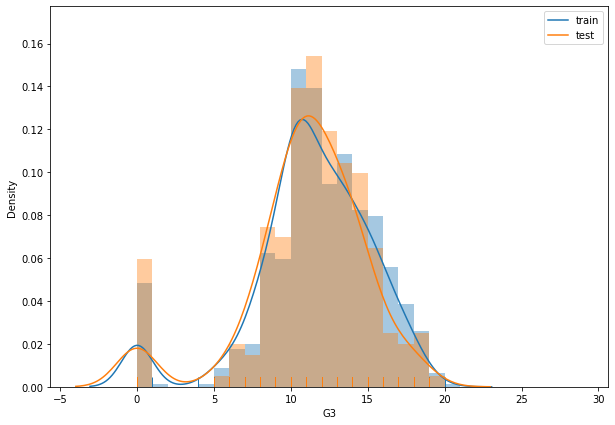

In [135]:
rcParams['figure.figsize'] = [10, 7]
sns.distplot(df_train.G3, bins=range(30), kde=True, rug=True)
sns.distplot(df_test.G3, bins=range(30), kde=True, rug=True)
plt.legend(['train','test'])
plt.show()

In [136]:
df_test.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,16.761194,2.532338,2.313433,1.601990,2.029851,0.238806,3.99005,3.233831,3.228856,1.522388,2.353234,3.537313,4.328358,10.925373,10.945274,10.995025
std,1.201119,1.095536,1.065959,0.768633,0.824078,0.602235,0.92190,1.044054,1.194723,0.905950,1.334017,1.414161,5.570605,2.954556,3.220557,3.826875
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.00000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.00000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.00000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,13.000000
max,20.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,40.000000,18.000000,19.000000,19.000000


In [137]:
df_train.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,16.735990,2.620174,2.408468,1.504359,1.958904,0.271482,3.924035,3.198007,3.146949,1.491905,2.270237,3.542964,4.514321,11.267746,11.303861,11.403487
std,1.251448,1.127282,1.105429,0.726017,0.845734,0.672600,0.937156,1.029198,1.147838,0.917207,1.278227,1.426184,6.404739,2.995723,3.301526,3.879300
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,1.500000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.500000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.500000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


различия незначительны

## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* Для решения задачи примените следующие методы:  
  * Линейная регрессия + регуляризации  
  * Полиномиальная регрессия  
  * KNN  
  * Деревья решений, Random Forest  
  
  Для каждого метода выполните настройку гиперпараметров на кросс-валидации.  
<br>    
* Оцените качество каждой модели на отложенной выборке, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

In [139]:
G3_train_true = df_train.G3
G3_test_true = df_test.G3

In [116]:
df_train = df_train.drop(columns=['G2','G3'])
df_test = df_test.drop(columns=['G2','G3'])
df_train_noG1 = df_train.drop(columns=['G1'])
df_test_noG1 = df_test.drop(columns=['G1'])

In [ ]:
def compute_metrics(y_pred, y_true, return_metrics=False):
    mse = metrics.mean_squared_error(y_pred=y_pred, y_true=y_true)
    rmse = np.sqrt(mse)
    mae = metrics.mean_absolute_error(y_pred=y_pred, y_true=y_true)
    medae = metrics.median_absolute_error(y_pred=y_pred, y_true=y_true)
    R2 = metrics.r2_score(y_pred=y_pred, y_true=y_true)
    if return_metrics: 
        return mse, rmse, mae, medae, R2
    else:
        print(f"MSE:   {mse}\nRMSE:  {rmse}\nMAE:   {mae}\nMedAE: {medae}\nR2:    {R2}")

## Часть 3. Бинарная классификация

Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  


### Задание 1  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.  
* Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.  
* Сравните между собой деревья решений, полученных на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 

In [ ]:
# your code here

### Задание 2  
  
На кросс-валидации (5-fold из 2 повторений) оцените, как меняется качество модели Random Forest с ростом числа деревьев (при дефолтных значениях остальных параметров). Провизуализируйте результаты. Сколько деревьев достаточно в данном случае и почему?  
**NB:** В сравнение включите конфигурацию, аналогичную простому дереву решений. 

In [ ]:
# your code here

### Задание 3  
  
* Настройте гиперпараметры модели Random Forest на 5-fold валдиации. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.
* Обучите Random Forest  с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество (F1-score) всего ансамбля и <u>каждого дерева отдельно</u>. Постройте график распределения качества деревьев в ансамбле и сравните результаты с качеством всего леса. Дайте комментарий.  
* Выведите важность признаков в Random Forest, сделайте выводы. 

In [ ]:
# your code here

### Задание 4  
  
* Примените логистическую регрессию для решения задачи, подберите оптимальные значения гиперпараметров. Оцените качество (roc auc) на 5-fold валидации из 2 повторений. 
* Аналогично (на такой же валидации (тех же подвыборках) с такой же метрикой) оцените качество Random Forest  с подобранными в предыдущем задании параметрами. Сравните с качеством логистическом регрессии.
* Обучите логистическую модель с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество - постройте ROC-кривую, вычислите roc auc. Вычислите аналогичную метрику для Random Forest из Задания 3, сравните точность моделей. 

In [ ]:
# your code here

### Задание 5  
  
* Используйте для решения задачи один из фреймворков градиентного бустинга: XGBoost, LightGDB или CatBoost.  
* Оцените на 5-fold валидации, как растет качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты.  
* Настройте гиперпараметры модели на 5-fold валидации, в качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.  
* Обучите модель с настроенными параметрами на всех данных для моделирования и оцените качество на отложенной выборке. Сравните результаты с другими моделями, дайте комментарий.

In [ ]:
# your code here

##  Часть 4. Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* Для решения задачи примените следующие методы:  
  * KNN  
  * Логистическая регрессия  
  * Деревья решений  
  * Random Forest
  * Gradient Boosting
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, используйте confusion matrix и производные от нее метрики. Сделайте выводы.    

In [ ]:
# your code here